# EDA On London Housing


## Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv('housing (1).csv')

In [3]:
# Top 5 Records

df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [4]:
# Checking columns

df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [5]:
# Lets check the number of rows and columns in the data set

df.shape

(13549, 6)

In [6]:
# Changing date to datetime datatype format

df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


In [8]:
# Checking for Summary statistics.

df.describe()

,date,average_price,houses_sold,no_of_crimes
count,13549,1.354900e+04,13455.000000,7439.000000
mean,2007-06-30 22:12:58.507638784,2.635197e+05,3893.994129,2158.352063
min,1995-01-01 00:00:00,4.072200e+04,2.000000,0.000000
25%,2001-04-01 00:00:00,1.323800e+05,247.000000,1623.000000
50%,2007-07-01 00:00:00,2.229190e+05,371.000000,2132.000000
75%,2013-10-01 00:00:00,3.368430e+05,3146.000000,2582.000000
max,2020-01-01 00:00:00,1.463378e+06,132163.000000,7461.000000
std,NaN,1.876175e+05,12114.402476,902.087742


## Check Null Values In The Dataset

In [9]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [10]:
df.fillna(0,inplace =True)

In [11]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

## Checking Duplicate Values

In [12]:
df[df.duplicated()]

,date,area,average_price,code,houses_sold,no_of_crimes


## Create Year and Month Columns

In [13]:
# Extracting year and month

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [14]:
df

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,0.0,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,0.0,1995,5
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,0.0,2019,9
13545,2019-10-01,england,249376,E92000001,68677.0,0.0,2019,10
13546,2019-11-01,england,248515,E92000001,67814.0,0.0,2019,11
13547,2019-12-01,england,250410,E92000001,0.0,0.0,2019,12


In [15]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [16]:
# Replace numeric month values with month names
df['month'] = df['month'].replace(month_map)
df

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1995,Jan
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1995,Feb
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1995,Mar
3,1995-04-01,city of london,77101,E09000001,7.0,0.0,1995,Apr
4,1995-05-01,city of london,84409,E09000001,10.0,0.0,1995,May
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,0.0,2019,Sep
13545,2019-10-01,england,249376,E92000001,68677.0,0.0,2019,Oct
13546,2019-11-01,england,248515,E92000001,67814.0,0.0,2019,Nov
13547,2019-12-01,england,250410,E92000001,0.0,0.0,2019,Dec


In [17]:
df.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13549
no_of_crimes     13549
year             13549
month            13549
dtype: int64

In [18]:
df.drop(['date','code'],axis=1,inplace=True)

In [19]:
df.head(2)

,area,average_price,houses_sold,no_of_crimes,year,month
0,city of london,91449,17.0,0.0,1995,Jan
1,city of london,82203,7.0,0.0,1995,Feb


## Insights

## Area Vs Average_Price

In [20]:
# maximum "average_price" area-wise

df.groupby('area')['average_price'].max().sort_values(ascending = False)

area
kensington and chelsea    1463378
westminster               1117408
city of london             939912
camden                     881212
hammersmith and fulham     781175
richmond upon thames       682854
islington                  677798
wandsworth                 633826
inner london               593486
haringey                   578728
hackney                    575846
barnet                     549401
southwark                  535685
merton                     534091
lambeth                    532804
brent                      519754
kingston upon thames       511260
ealing                     489687
london                     488527
harrow                     479341
tower hamlets              470788
waltham forest             452299
bromley                    449293
outer london               432669
redbridge                  430708
lewisham                   423063
hillingdon                 419452
hounslow                   413672
greenwich                  408407
enfield  

## Year Vs Average_Price

In [21]:
# maximum "average_price" per year

df.groupby('year')['average_price'].max().sort_values(ascending = False)

year
2018    1463378
2017    1412255
2014    1365050
2016    1357231
2015    1353679
2019    1294113
2013    1217729
2020    1178166
2012    1077366
2011     959520
2010     884674
2008     832753
2007     830950
2009     782459
2006     644541
2004     559286
2005     555847
2002     497538
2003     488704
2001     451028
2000     397353
1999     354241
1998     277600
1997     265112
1996     223197
1995     200722
Name: average_price, dtype: int64

In [22]:
# mean "average_price" per year

df.groupby('year')['average_price'].mean().sort_values(ascending = False)

year
2017    469978.938889
2018    467240.674074
2020    463329.977778
2019    460056.659259
2016    454884.461111
2015    421356.100000
2014    388208.392593
2013    334589.564815
2012    309409.501852
2011    294819.138889
2010    287559.164815
2008    287478.972222
2007    285944.279630
2009    259296.896296
2006    249303.109259
2005    233314.512963
2004    224604.720370
2003    205099.553704
2002    182190.731481
2001    156932.355556
2000    139979.442593
1999    114256.172222
1998    101747.073801
1997     89618.350000
1996     78875.274908
1995     75880.235185
Name: average_price, dtype: float64

## Month Vs Average_Price

In [23]:
# maximum "average_price" per year

df.groupby('month')['average_price'].max().sort_values(ascending = False)

month
Jan    1463378
Aug    1418032
Feb    1412255
Apr    1399839
Mar    1392610
May    1388174
Sep    1388037
Nov    1365050
Dec    1364185
Oct    1348121
Jul    1345616
Jun    1341276
Name: average_price, dtype: int64

## Number of crimes recorded per area

In [24]:
# maximum number of crimes per area

df.groupby('area')['no_of_crimes'].max().sort_values(ascending = False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [25]:
df.groupby('average_price')[['area', 'no_of_crimes']].max().sort_values(by='average_price', ascending=False)

,area,no_of_crimes
average_price,,
1463378,kensington and chelsea,1737.0
1418032,kensington and chelsea,2339.0
1412255,kensington and chelsea,1367.0
1399839,kensington and chelsea,1723.0
1394421,kensington and chelsea,1534.0
...,...,...
41728,north east,0.0
41688,north east,0.0
41588,north east,0.0


In [26]:
# maximum number of crimes per year

df.groupby('year')['no_of_crimes'].max().sort_values(ascending = False)

year
2019    7461.0
2002    7076.0
2001    7002.0
2018    6743.0
2020    6405.0
2004    6290.0
2003    6149.0
2011    6106.0
2012    5972.0
2010    5766.0
2005    5753.0
2009    5703.0
2008    5578.0
2007    5509.0
2006    5467.0
2017    5198.0
2013    5047.0
2016    4903.0
2015    4561.0
2014    4478.0
1996       0.0
2000       0.0
1999       0.0
1998       0.0
1997       0.0
1995       0.0
Name: no_of_crimes, dtype: float64

In [47]:
# maximum number of crimes per month

df.groupby('month')['no_of_crimes'].max().sort_values(ascending = False)

month
Dec    7461.0
Apr    7227.0
Mar    7215.0
Oct    7208.0
May    7076.0
Aug    7069.0
Jul    7012.0
Jun    6931.0
Nov    6843.0
Jan    6539.0
Feb    6508.0
Sep    6451.0
Name: no_of_crimes, dtype: float64

In [27]:
df.groupby('area')[['average_price', 'houses_sold']].max().sort_values(by='average_price', ascending=False)

,average_price,houses_sold
area,,
kensington and chelsea,1463378,515.0
westminster,1117408,708.0
city of london,939912,104.0
camden,881212,446.0
hammersmith and fulham,781175,510.0
richmond upon thames,682854,701.0
islington,677798,529.0
wandsworth,633826,1073.0
inner london,593486,7437.0


In [28]:
df.groupby('year')[['area', 'houses_sold']].max().sort_values(by='houses_sold', ascending=False)

,area,houses_sold
year,,
2002,yorks and the humber,132163.0
2004,yorks and the humber,126778.0
2001,yorks and the humber,124849.0
2007,yorks and the humber,121246.0
2006,yorks and the humber,120679.0
2003,yorks and the humber,119798.0
1999,yorks and the humber,119652.0
2016,yorks and the humber,119302.0
2000,yorks and the humber,105431.0


In [29]:
df.groupby('month')[['area', 'houses_sold']].max().sort_values(by='houses_sold', ascending=False)

,area,houses_sold
month,,
May,yorks and the humber,132163.0
Jul,yorks and the humber,126778.0
Aug,yorks and the humber,126360.0
Jun,yorks and the humber,120679.0
Oct,yorks and the humber,119798.0
Dec,yorks and the humber,119458.0
Mar,yorks and the humber,119302.0
Apr,yorks and the humber,114092.0
Sep,yorks and the humber,113761.0


## Total counts of records of each area where average price is less than 100000

In [31]:
df[df.average_price < 100000].area.value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         

## Data Visualization 

### Area with average_price

In [32]:
df1 = df.groupby('area')['average_price'].mean().round(2).sort_values(ascending = False).head(5)

In [33]:
 df1.index

Index(['kensington and chelsea', 'westminster', 'camden',
       'hammersmith and fulham', 'city of london'],
      dtype='object', name='area')

In [34]:
df1.values

array([742060.37, 543865.94, 467500.91, 443791.86, 423942.58])

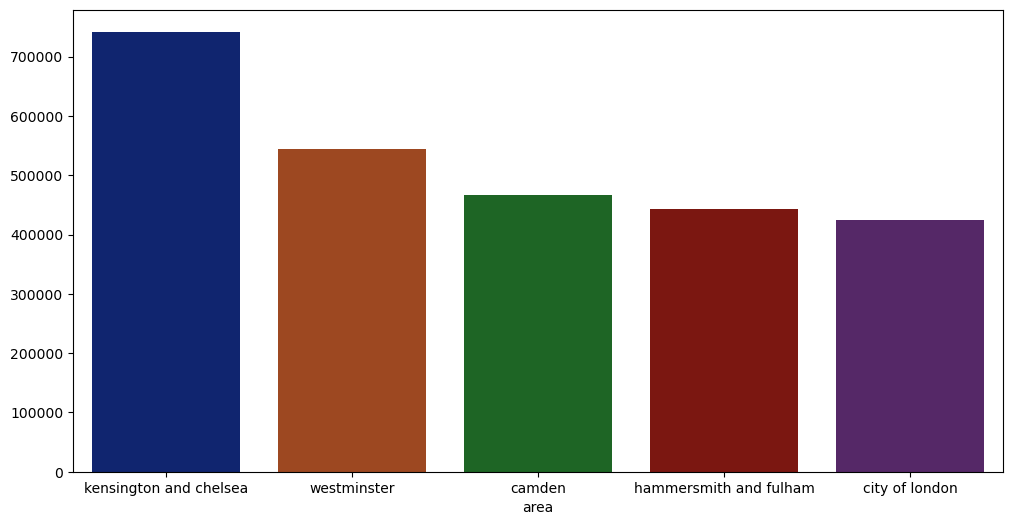

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x = df1.index, y = df1.values, palette = 'dark')
plt.show()

kensington and chelsea has higher average price. The above barplot shows the top five areas with higher average prices.

### area with house sold

In [36]:
df2 = df.groupby('area')['houses_sold'].sum().sort_values(ascending = False).head(5)
df2

area
england            23077637.0
south east          4195116.0
london              3134378.0
north west          2895280.0
east of england     2809800.0
Name: houses_sold, dtype: float64

Text(0, 0.5, '')

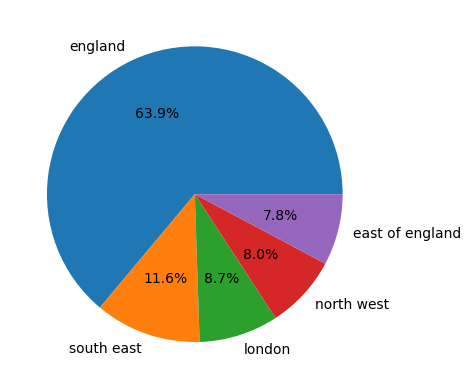

In [37]:
df2.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel(None)

England has the most number of households.

### year with house sold

In [38]:
df3 = df.groupby('year')['houses_sold'].sum().sort_values(ascending = False).head(6)
df3

year
2002    2875300.0
2006    2841060.0
2007    2727506.0
2004    2712216.0
2001    2661822.0
2003    2653878.0
Name: houses_sold, dtype: float64

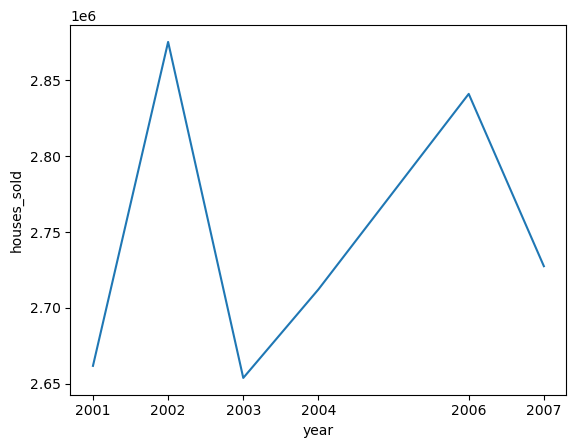

In [39]:
sns.lineplot(df3)
plt.xticks(df3.index)
plt.show()

In 2002, there is more number of households as compared to other years.

### month with house sold

In [40]:
df4 = df.groupby('month')['houses_sold'].sum().sort_values(ascending = False)
df4

month
Jul    5006940.0
Aug    5006415.0
Jun    4790590.0
Oct    4661097.0
Nov    4563825.0
Sep    4539468.0
Dec    4420896.0
May    4402064.0
Mar    4254574.0
Apr    3987560.0
Feb    3423604.0
Jan    3336658.0
Name: houses_sold, dtype: float64

In July, there is more number of households as compared to other months.

<Axes: xlabel='houses_sold', ylabel='Density'>

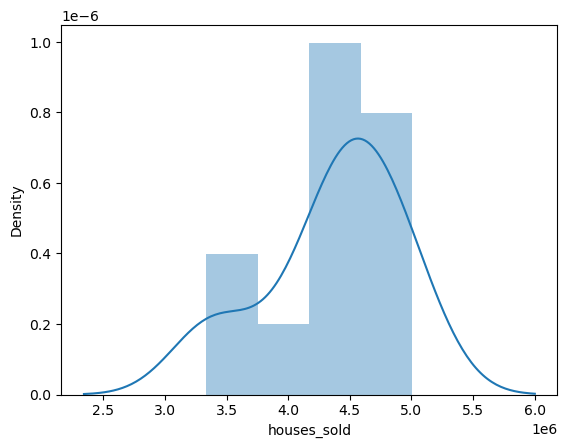

In [41]:
sns.distplot(df4)

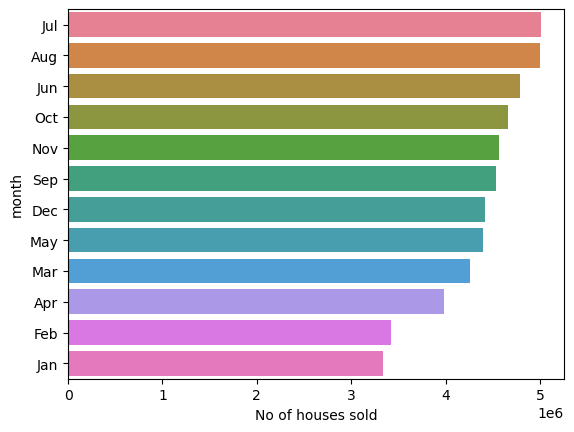

In [43]:
sns.barplot(y = df4.index, x = df4.values, palette = 'husl')
plt.xlabel('No of houses sold')
plt.show()

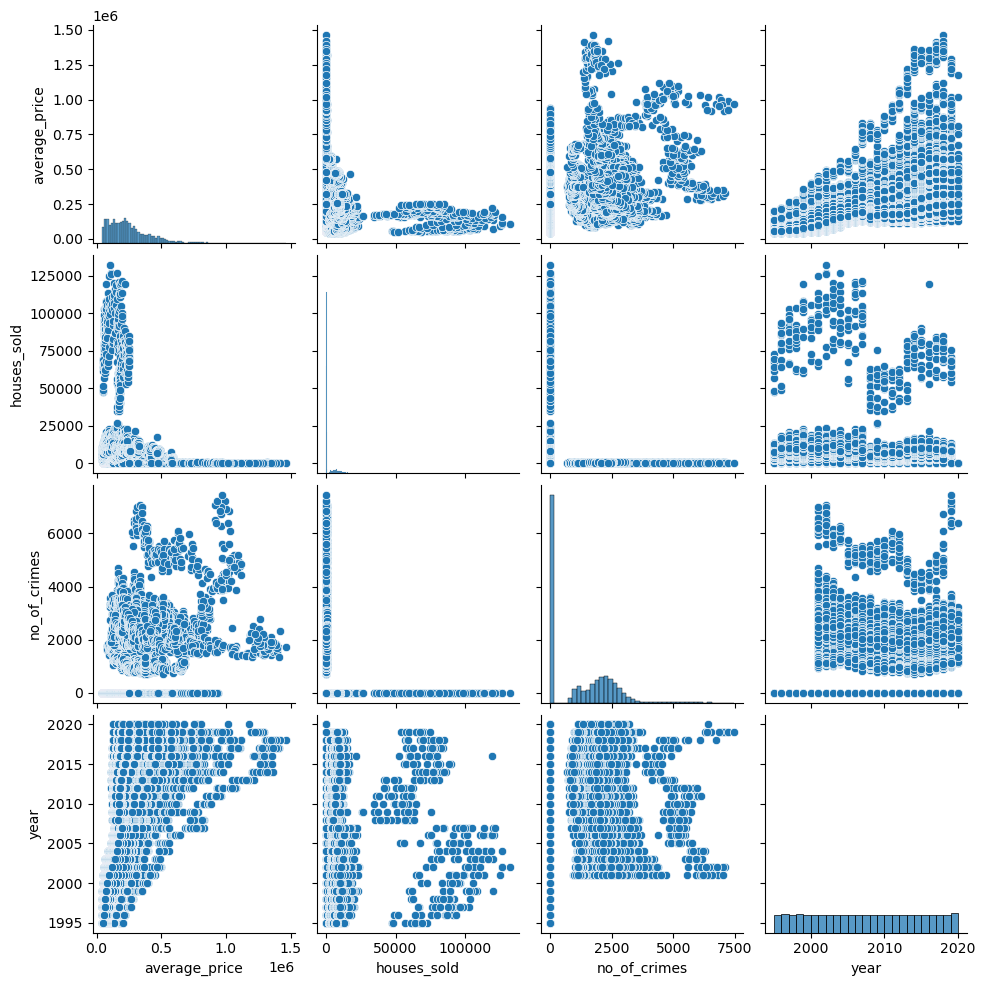

In [48]:
sns.pairplot(df)
plt.show()